# Modeling

## Libraries and Dataset

In [7]:
# Libraries

# Standard
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)

# Statistical tests
from scipy.stats import chi2_contingency

In [13]:
# Import Dataset

output_path = r"C:\Users\alexa\OneDrive\AlexPerez\Dokumente\2 Soros\Data Science\Projects\employee_attrition_Dec24\data\raw\employee_attrition_synthetic_IT.csv"
df= pd.read_csv(output_path)

# Remove Employee_ID column
if 'Employee_ID' in df.columns:
    df = df.drop(columns=['Employee_ID'])
    print("'Employee_ID' column removed.")
else:
    print("'Employee_ID' column not found.")

display(df.head())
display(df.info())

'Employee_ID' column removed.


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Age,Tenure,Gender,Department,Salary,Overtime,Distance_to_Work,Attrition
0,4,4,5,5,5,4,5,5,4,4,4,4,5,5,4,5,43,2,Male,Development,104715,Yes,0.00,No
1,5,5,4,5,4,4,5,5,5,4,4,5,5,4,5,4,50,1,Female,QA,73815,No,8.71,No
2,1,1,1,2,2,2,2,1,2,1,1,1,1,1,1,2,44,4,Male,Development,76687,Yes,0.00,Yes
3,2,2,1,1,2,2,2,2,1,1,1,2,2,1,1,1,42,0,Male,Development,99861,No,0.00,Yes
4,5,5,5,5,5,5,5,4,4,4,5,4,5,5,4,5,37,4,Male,Support,115343,No,4.62,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Q1                5000 non-null   int64  
 1   Q2                5000 non-null   int64  
 2   Q3                5000 non-null   int64  
 3   Q4                5000 non-null   int64  
 4   Q5                5000 non-null   int64  
 5   Q6                5000 non-null   int64  
 6   Q7                5000 non-null   int64  
 7   Q8                5000 non-null   int64  
 8   Q9                5000 non-null   int64  
 9   Q10               5000 non-null   int64  
 10  Q11               5000 non-null   int64  
 11  Q12               5000 non-null   int64  
 12  Q13               5000 non-null   int64  
 13  Q14               5000 non-null   int64  
 14  Q15               5000 non-null   int64  
 15  Q16               5000 non-null   int64  
 16  Age               5000 non-null   int64  


None

## Visualization of Variables

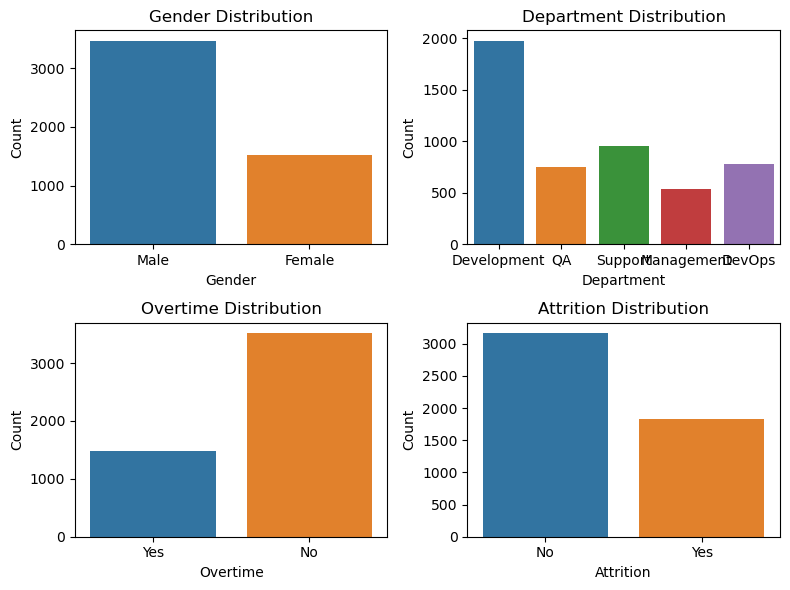

In [3]:
# First Visualizations

# Visualization of categorical variables
def plot_categorical_distributions(df):
    plt.figure(figsize=(8, 6))
    
    # Gender Distribution
    plt.subplot(2, 2, 1)
    sns.countplot(x='Gender', data=df)
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    
    # Department Distribution
    plt.subplot(2, 2, 2)
    sns.countplot(x='Department', data=df)
    plt.title('Department Distribution')
    plt.xlabel('Department')
    plt.ylabel('Count')
    
    # Overtime Distribution
    plt.subplot(2, 2, 3)
    sns.countplot(x='Overtime', data=df)
    plt.title('Overtime Distribution')
    plt.xlabel('Overtime')
    plt.ylabel('Count')
    
    # Attrition Distribution
    plt.subplot(2, 2, 4)
    sns.countplot(x='Attrition', data=df)
    plt.title('Attrition Distribution')
    plt.xlabel('Attrition')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Call the visualization function
plot_categorical_distributions(df)

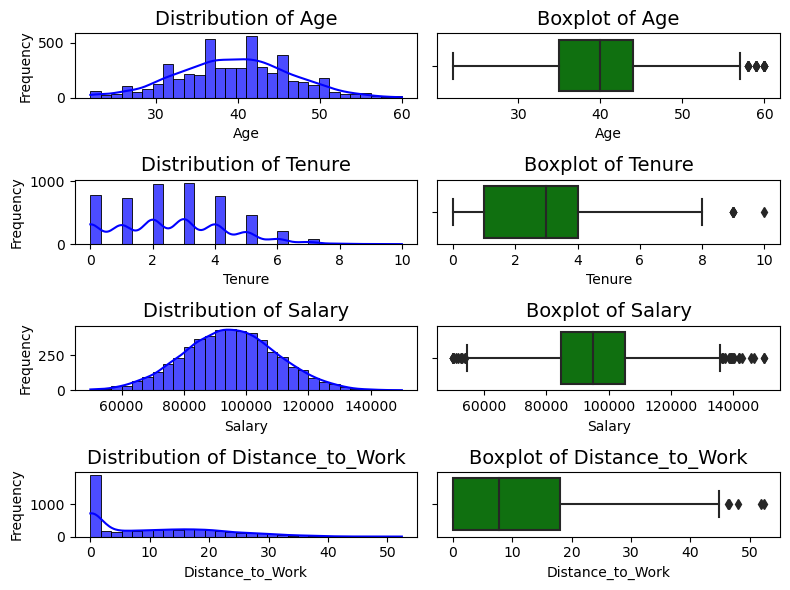

In [4]:
# Function to visualize numerical variables
def visualize_numeric_variables(df, columns):
    plt.figure(figsize=(8, 6))

    for i, column in enumerate(columns):
        # Histogram
        plt.subplot(len(columns), 2, 2*i + 1)
        sns.histplot(df[column], kde=True, bins=30, color='blue', alpha=0.7)
        plt.title(f'Distribution of {column}', fontsize=14)
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(len(columns), 2, 2*i + 2)
        sns.boxplot(x=df[column], color='green')
        plt.title(f'Boxplot of {column}', fontsize=14)
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

# Columns to visualize
columns_to_visualize = ['Age', 'Tenure', 'Salary', 'Distance_to_Work']

# Call the function
visualize_numeric_variables(df, columns_to_visualize)

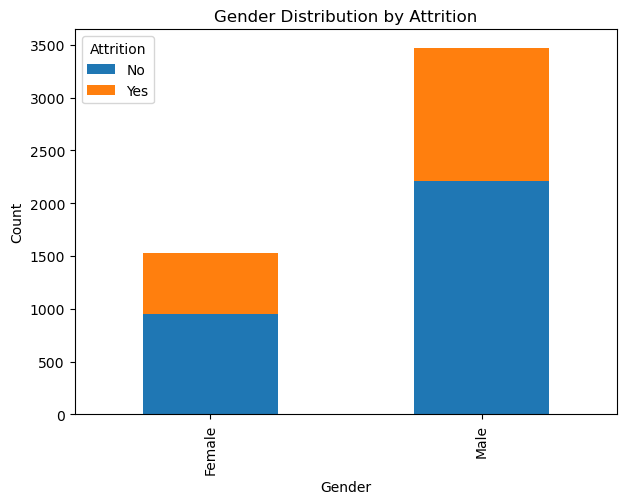

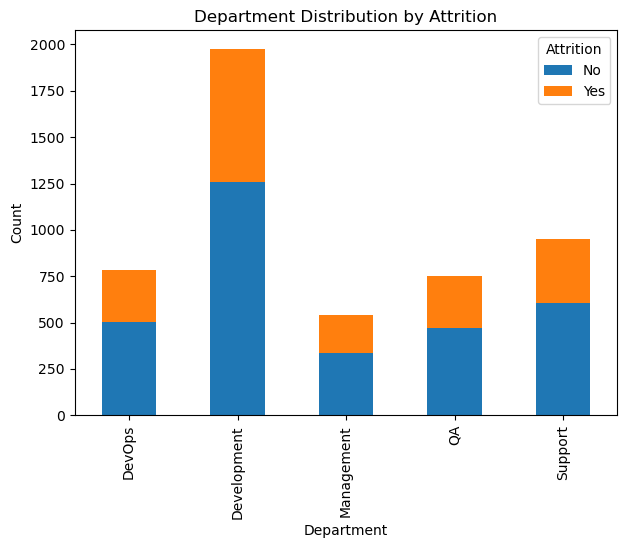

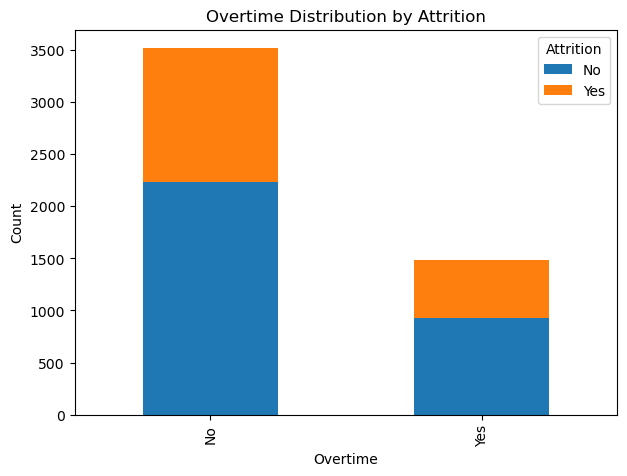

In [6]:
# How does the target variable relate to categorical features? Gender, Deparment and Overtime.

# Stacked bar charts for categorical variables by Attrition
categorical_vars = ['Gender', 'Department', 'Overtime']
for var in categorical_vars:
    pd.crosstab(df[var], df['Attrition']).plot(kind='bar', stacked=True, figsize=(7, 5))
    plt.title(f'{var} Distribution by Attrition')
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.show()

Interpreation

1. Gender Distribution by Attrition: 
Males have a higher absolute count for both Attrition = No and Attrition = Yes, consistent with the 70% male distribution in the dataset.
However, females seem to have a slightly higher proportion of attrition compared to males. **A statistical test for this is needed.**  
There might be workplace factors that disproportionately affect females, contributing to a higher attrition rate relative to their overall representation.

2. Department Distribution by Attrition
Employees in Development seem experience the highest count of attrition (Attrition = Yes) compared to other departments. **A statistical test for this is needed.** 
QA, DevOps, and Support have moderate attrition counts, while Management shows the lowest attrition.
Development roles might have higher attrition due to: High-pressure environments, Opportunities for job switching (in-demand skills).
Management roles might show lower attrition due to greater job stability and higher job satisfaction.

3. Overtime Distribution by Attrition
Employees who work overtime have a higher proportion of attrition compared to those who don’t. **A statistical test for this is needed.** 
Non-overtime workers are more likely to stay with the company (Attrition = No).
Overtime could be a significant stressor or indicator of dissatisfaction, leading to higher attrition rates.
Employees not working overtime might experience better work-life balance, leading to lower attrition.


In [8]:
# Let's test the statements above via Chi-Square Test of Indepence. 

# Gender and Attrition: Null hypothesis: Gender and Attrition are independent.

# Create a contingency table for Overtime and Attrition
overtime_attrition_table = pd.crosstab(df['Overtime'], df['Attrition'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(overtime_attrition_table)

print("Chi-Square Test for Overtime and Attrition")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("Result: Significant relationship between Overtime and Attrition (Reject H0)")
else:
    print("Result: No significant relationship between Overtime and Attrition (Fail to Reject H0)")

# Since p>0.05 we reject the Null hypothesis and discern a significat association as presumed before.

Chi-Square Test for Overtime and Attrition
Chi2 Statistic: 0.1986150774100302
P-value: 0.6558410455096021
Result: No significant relationship between Overtime and Attrition (Fail to Reject H0)


In [9]:
# Department vs Attrition: Null hypothesis: Department and Attrition are independent. 

# Create a contingency table for Department and Attrition
department_attrition_table = pd.crosstab(df['Department'], df['Attrition'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(department_attrition_table)

print("Chi-Square Test for Department and Attrition")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("Result: Significant relationship between Department and Attrition (Reject H0)")
else:
    print("Result: No significant relationship between Department and Attrition (Fail to Reject H0)")



Chi-Square Test for Department and Attrition
Chi2 Statistic: 1.1763582801465589
P-value: 0.881975523053572
Result: No significant relationship between Department and Attrition (Fail to Reject H0)


In [10]:
# Overtime vs Attrition: Null hypothesis: Overtime and Attrition are independent. 

# Create a contingency table for Overtime and Attrition
overtime_attrition_table = pd.crosstab(df['Overtime'], df['Attrition'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(overtime_attrition_table)

print("Chi-Square Test for Overtime and Attrition")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("Result: Significant relationship between Overtime and Attrition (Reject H0)")
else:
    print("Result: No significant relationship between Overtime and Attrition (Fail to Reject H0)")


Chi-Square Test for Overtime and Attrition
Chi2 Statistic: 0.1986150774100302
P-value: 0.6558410455096021
Result: No significant relationship between Overtime and Attrition (Fail to Reject H0)


The Chi-Square tests conducted indicate no significant relationship between the Gender, Department and Overtime with the target variable. 

'Attrition' column encoded as numeric values (1 = Yes, 0 = No).


C:\Users\alexa\AppData\Local\Temp\ipykernel_7228\2339293477.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


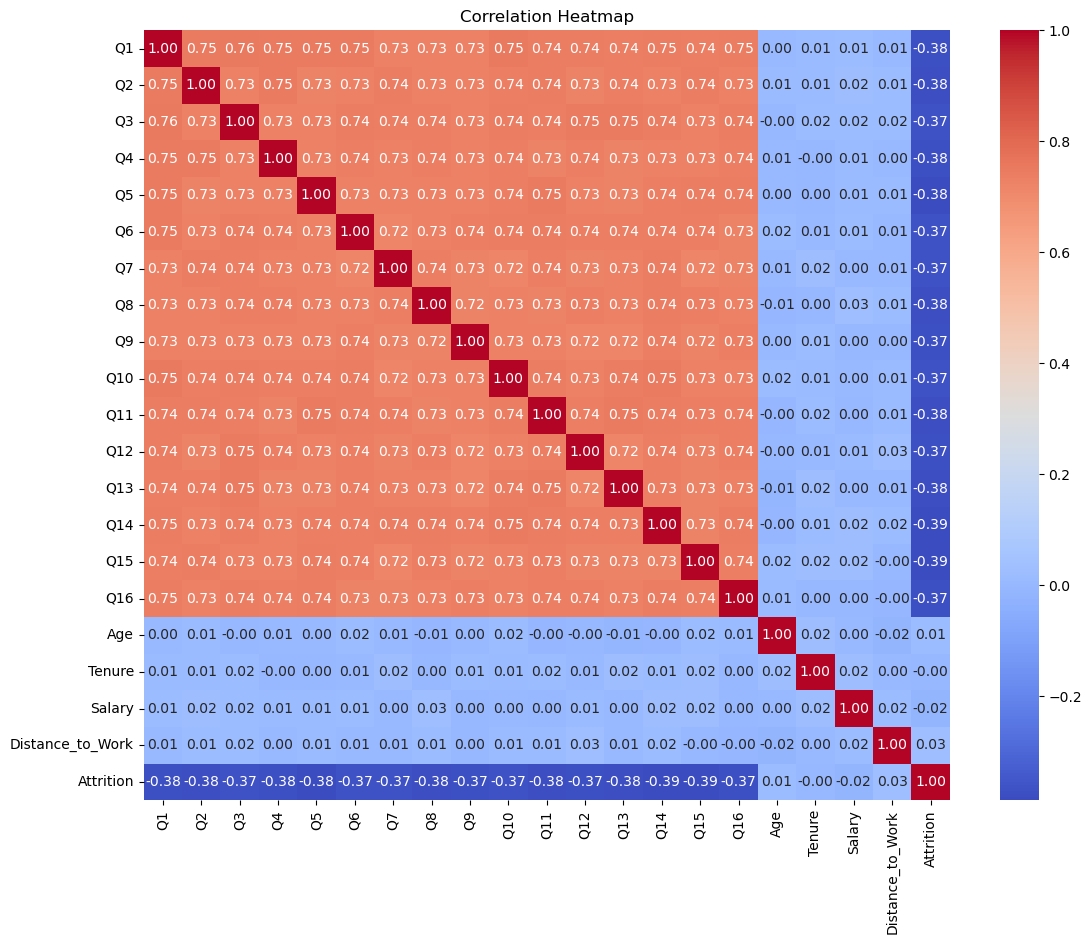

In [15]:
# Let's move to numerical variables and see if there are correlations between numerical features and attrition

# Encode the Attrition column
if 'Attrition' in df.columns:
    df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
    print("'Attrition' column encoded as numeric values (1 = Yes, 0 = No).")

# Correlation heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows little to no correlation between Attrition and other variables.
Potential reasons:
- The synthetic dataset may not have strong relationships because the data was largely randomly generated with probabilities and not real-world patterns.
- Correlation measures linear relationships. Potential non-linear relationships will not appear in the heatmap.

Some variables should show linearity. For example, Age and Tenure (older employees have longer tenures), Tenure and Salary (employees with longer tenures often earn higher salaries)
The data generation process was not specifically designed to capture these expected relationships. Tenure was calculated as Age-Start Age but not tied to salary. And the salary distribution was random and not tied to tenure.

Collinearity among the Q12+ variables (above 0.7) are expected because all questions measure workplace engagement and engagement levels were weighted with specific probabilities (engagement_level = random.choices(["high", "low", "mixed"], weights=[0.3, 0.4, 0.3]). This shared dependency on the engagement level causes all Q12+ responses to exhibit similar patterns, leading to high correlations between them.

Note: It is still worthwhile to run classification algorithms, as correlation does not mean the variables are not useful for classification and many machine learning models capture
non-linear relationships, which as said before, do not show in the correlation matrix. 

If the models perform poorly, we may go back to the dataset and re-structure it. 

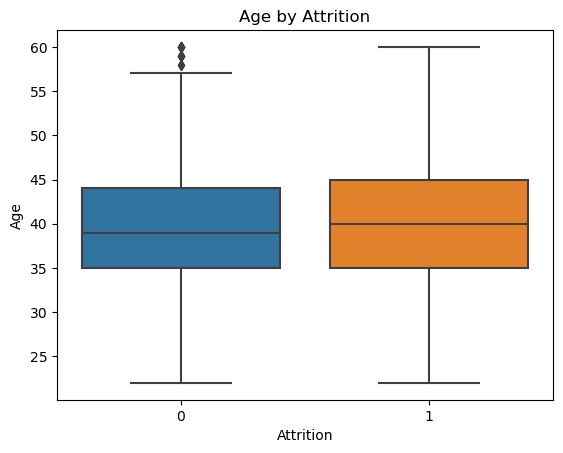

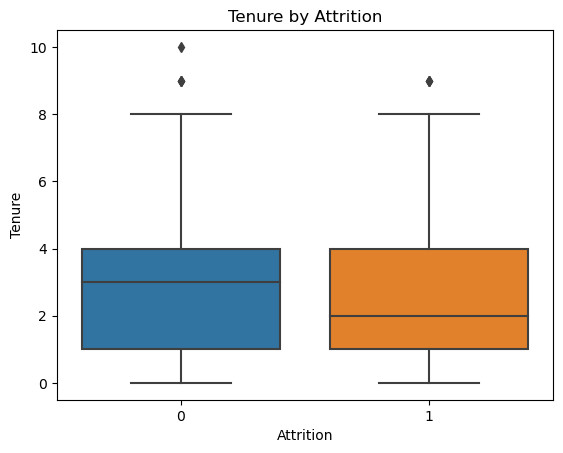

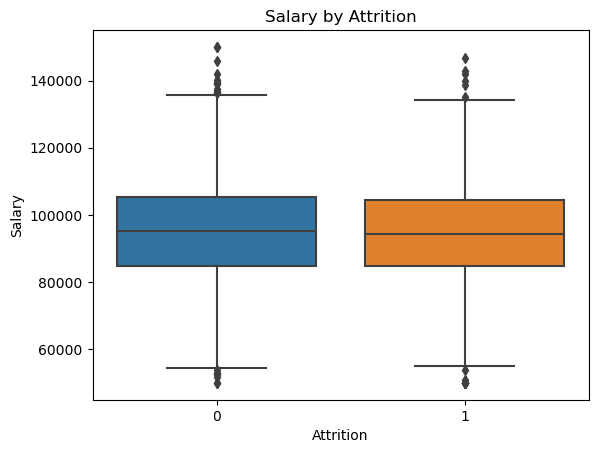

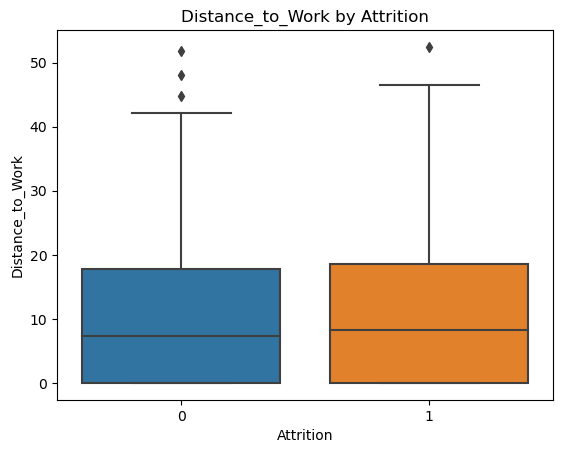

In [16]:
# Visualizing outliers - Boxplots for numerical variables by Attrition

numerical_vars = ['Age', 'Tenure', 'Salary', 'Distance_to_Work']
for var in numerical_vars:
    sns.boxplot(data=df, x='Attrition', y=var)
    plt.title(f'{var} by Attrition')
    plt.show()

Which models require the handling of outliers?
Yes: Logistic Regression and SVM
No: CatBoost and MLP.

Plan to simplify the workflow: Use of RobustScaler, which scales the data using the media and the IQR, instead of the mean and standard deviation. It is more robust to outliers.
It will then maitain outliers for Tree-Based Models but mitigate outlier effects (extreme values) for sensitive models suchas LR and SVM.
